In [31]:
import pandas as pd
from pathlib import Path
import yfinance as yf
pd.options.plotting.backend = "plotly"

In [36]:
def get_btc_df(FORCE_DOWNLOAD=False):
    '''
    Read btc_csv local file if exists. If not - downloads from
    https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv
    
    INPUT: bool to force download (deafault set to false).
    OUTPUT: pandas dataframe
    '''
    
    btc_csv_file_name = "Bitstamp_BTCUSD_d.csv"

    if Path(btc_csv_file_name).is_file() and not FORCE_DOWNLOAD:
        df = pd.read_csv(btc_csv_file_name, index_col=0)
        
    else:
        # url = 'https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv'
        url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCUSD_d.csv'
        df = pd.read_csv(url, header=1)

        # Sort ascending by unix date
        df = df.sort_values(by='unix', ascending=True)

        # Date conversion
        df.date = pd.to_datetime(df['date']).dt.date

        # Housekeep: index change, remove leftovers, 
        df.index = df.date
        df = df.drop(columns=['unix', 'date', 'symbol'])
        df = df.rename(columns={"Volume BTC":"vol_btc", "Volume USD":"vol_usd"})

        # CSV store
        df.to_csv(btc_csv_file_name)
        
    return df

In [37]:
df = get_btc_df(FORCE_DOWNLOAD=True)

df.head(3)

,open,high,low,close,vol_btc,vol_usd
date,,,,,,
2015-10-08,0.00,245.00,0.0,243.60,34.754703,8466.245554
2015-10-09,243.60,249.97,243.6,245.51,61.587068,15120.240952
2015-10-10,245.51,246.30,244.6,246.30,30.870549,7603.416293


In [38]:
df['v'] = df.vol_btc.cumsum()

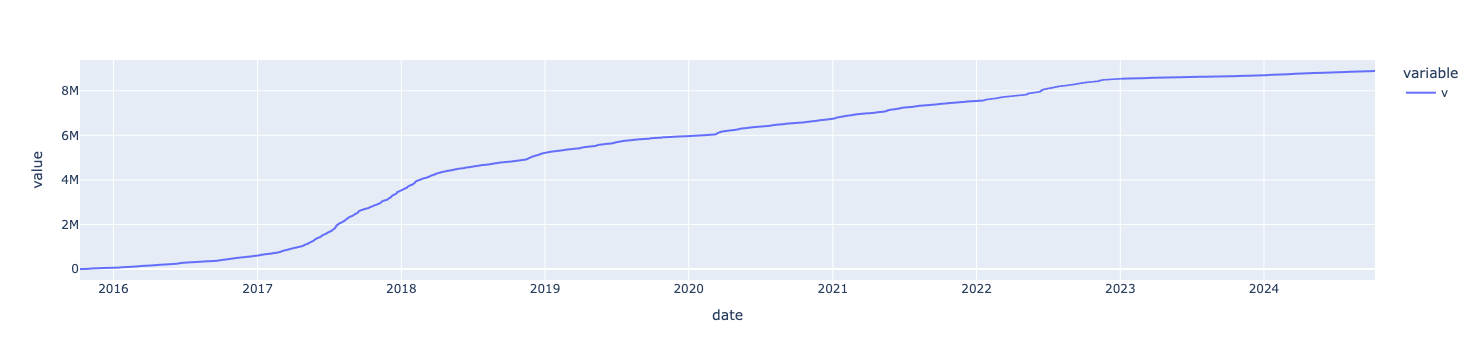

In [39]:
df.v.plot()

In [16]:
y = yf.download("BTC-USD", period="max", interval="1d") 

[*********************100%***********************]  1 of 1 completed


In [23]:
y.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700


In [24]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1728432000000,2024-10-09 00:00:00,BTC/USD,62100.00,62505.76,60281.89,60579.58,782.198898,4.738528e+07
1,1728345600000,2024-10-08 00:00:00,BTC/USD,62240.66,63169.11,61827.83,62100.00,773.631939,4.804254e+07
2,1728259200000,2024-10-07 00:00:00,BTC/USD,62813.28,64461.15,60641.76,62240.66,868.800735,5.407473e+07
3,1728172800000,2024-10-06 00:00:00,BTC/USD,62079.10,62950.00,59658.98,62813.28,249.354673,1.566278e+07
4,1728086400000,2024-10-05 00:00:00,BTC/USD,62086.83,62369.14,60000.00,62079.10,171.844452,1.066795e+07


In [40]:
# BINANCE API

In [53]:
from binance.client import Client
import pandas as pd

# Wprowadź klucze API, jeśli chcesz korzystać z autoryzowanego dostępu
api_key = apik
api_secret = apis

# Inicjalizacja klienta Binance
client = Client(api_key)

# Funkcja do pobrania historycznych danych kline (świeczek) dla BTC/USDT
def get_historical_data(symbol, interval, start_str, end_str=None):
    # Pobierz dane kline
    klines = client.get_historical_klines(symbol, interval, start_str, end_str)
    
    # Utwórz DataFrame z wynikami
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    
    # Przekształcenie kolumn do odpowiednich typów danych
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['open'] = pd.to_numeric(df['open'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['close'] = pd.to_numeric(df['close'])
    df['volume'] = pd.to_numeric(df['volume'])
    
    return df

# Przykład pobrania danych dla BTC/USDT na interwale dziennym od 1 stycznia 2017 roku
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY  # Interwał 1 dzień
start_str = '1 Jan 2000'

# Pobierz dane
btc_data = get_historical_data(symbol, interval, start_str)

# Wyświetl pierwsze 5 wierszy danych
# print(btc_data.head())

# Opcjonalnie zapisz dane do pliku CSV
btc_data.to_csv('btc_historical_data.csv', index=False)


In [55]:
# btc_data

In [57]:

depth = client.get_order_book(symbol='BNBBTC')
trades = client.get_historical_trades(symbol='BNBBTC')



In [60]:
dft = pd.DataFrame(trades)
dft.tail(3)

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
497,260408312,0.00934300,0.65500000,0.00611966,1728550843251,False,True
498,260408313,0.00934300,0.05300000,0.00049517,1728550843466,False,True
499,260408314,0.00934300,0.08900000,0.00083152,1728550845417,False,True


In [61]:
dfd = pd.DataFrame(depth)
dfd.tail(3)

,lastUpdateId,bids,asks
97,3608335203,"[0.00924400, 0.96300000]","[0.00944000, 41.47600000]"
98,3608335203,"[0.00924300, 0.48000000]","[0.00944100, 2.99400000]"
99,3608335203,"[0.00924200, 1.60600000]","[0.00944200, 2.78500000]"
